# EDA

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

# use sklearn to import a dataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
path = "./Data/"

In [4]:
# Reading csv files from local repository
def read(pathname):
    df = pd.read_csv(pathname, header=[0], index_col = [0])
    return df

In [5]:
Total = read(path+"TotalData.csv")

In [6]:
Total.head()

,Rental_Price,Time,District,RoomType,GDP In Chained (2015) Dollars,Total Unemployment Rate,Resident Unemployment Rate,CPI/Inflation,Total Demand,Total Domestic Demand,Government Securities - 5-Year Bond Yield,Government Securities - 2-Year Bond Yield,Government Securities - 10-Year Bond Yield
0,2300.0,Q4 2022,Ang Mo Kio,Room3,132329.6,1.8,2.5,110.679,-4.1,4.6,2.92,2.81,3.056667
1,2900.0,Q4 2022,Ang Mo Kio,Room4,132329.6,1.8,2.5,110.679,-4.1,4.6,2.92,2.81,3.056667
2,3150.0,Q4 2022,Ang Mo Kio,Room5,132329.6,1.8,2.5,110.679,-4.1,4.6,2.92,2.81,3.056667
3,2300.0,Q4 2022,Bedok,Room3,132329.6,1.8,2.5,110.679,-4.1,4.6,2.92,2.81,3.056667
4,2800.0,Q4 2022,Bedok,Room4,132329.6,1.8,2.5,110.679,-4.1,4.6,2.92,2.81,3.056667


In [7]:
Total.describe()

,Rental_Price,GDP In Chained (2015) Dollars,Total Unemployment Rate,Resident Unemployment Rate,CPI/Inflation,Total Demand,Total Domestic Demand,Government Securities - 5-Year Bond Yield,Government Securities - 2-Year Bond Yield,Government Securities - 10-Year Bond Yield
count,4778.000000,4778.000000,4778.000000,4778.000000,4778.000000,4778.000000,4778.000000,4778.000000,4778.000000,4778.000000
mean,2156.894517,104345.103411,2.209502,3.264546,96.555095,4.442277,4.090603,1.431394,0.953208,2.158461
std,495.819510,17245.361981,0.563418,0.824201,6.655812,6.197128,7.866811,0.631444,0.659646,0.517704
min,2.000000,69395.700000,1.500000,2.200000,80.098000,-13.200000,-21.700000,0.366667,0.180000,0.843333
25%,1850.000000,92084.300000,1.800000,2.700000,93.680000,1.000000,0.300000,0.866667,0.416667,1.796667
50%,2100.000000,105931.800000,2.000000,2.900000,98.939000,3.600000,2.900000,1.503333,0.876667,2.286667
75%,2450.000000,119543.200000,2.600000,3.900000,99.708000,7.700000,7.500000,1.850000,1.300000,2.470000
max,21000.000000,132329.600000,4.100000,6.100000,110.679000,21.300000,24.300000,2.920000,2.810000,3.203333


Found only one value in 2020 Q2 that the Executive room type counts for $21000, and the second largest is just $4200. It seems it is an outlier, we just delete this one.

In [8]:
max_value = Total["Rental_Price"].max()
max_row = Total[Total['Rental_Price'] == max_value]
Total = Total.drop(max_row.index)


In [9]:
Total.describe()

,Rental_Price,GDP In Chained (2015) Dollars,Total Unemployment Rate,Resident Unemployment Rate,CPI/Inflation,Total Demand,Total Domestic Demand,Government Securities - 5-Year Bond Yield,Government Securities - 2-Year Bond Yield,Government Securities - 10-Year Bond Yield
count,4777.000000,4777.000000,4777.000000,4777.000000,4777.000000,4777.000000,4777.000000,4777.000000,4777.000000,4777.000000
mean,2152.949969,104344.779653,2.209169,3.264078,96.554514,4.445384,4.096002,1.431410,0.953298,2.158401
std,414.161565,17247.152784,0.563006,0.823653,6.656388,6.194054,7.858776,0.631509,0.659685,0.517742
min,2.000000,69395.700000,1.500000,2.200000,80.098000,-13.200000,-21.700000,0.366667,0.180000,0.843333
25%,1850.000000,92084.300000,1.800000,2.700000,93.680000,1.000000,0.300000,0.866667,0.416667,1.796667
50%,2100.000000,105931.800000,2.000000,2.900000,98.939000,3.600000,2.900000,1.503333,0.876667,2.286667
75%,2450.000000,119543.200000,2.600000,3.900000,99.708000,7.700000,7.500000,1.850000,1.300000,2.470000
max,4200.000000,132329.600000,4.100000,6.100000,110.679000,21.300000,24.300000,2.920000,2.810000,3.203333


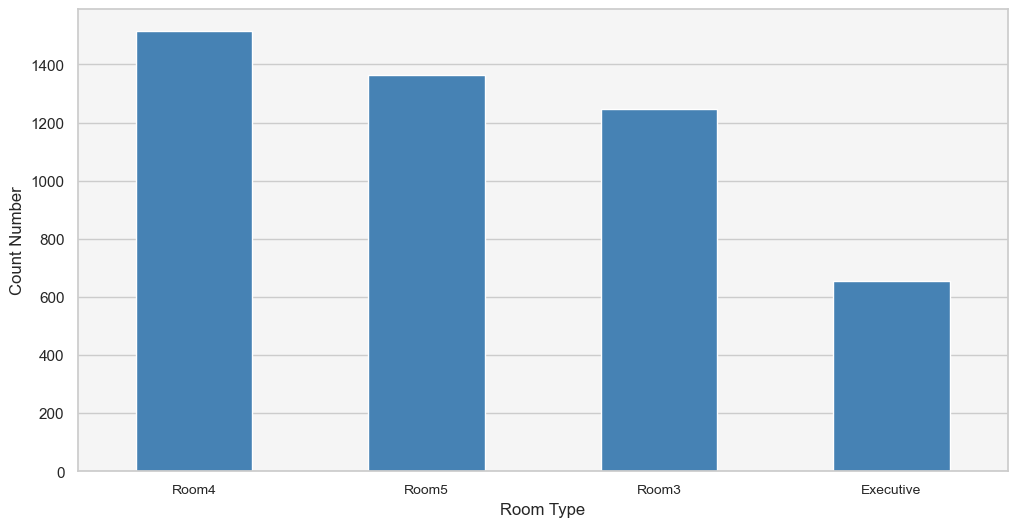

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and color palette
sns.set(style="whitegrid", color_codes=True)

# Data
data = Total.RoomType.value_counts()

# Create bar chart and set color
ax = data.plot(kind='bar', color='steelblue')

plt.xlabel("Room Type", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.ylabel("Count Number", fontsize=12)

# Set grid lines and background color
ax.grid(False, axis='x')
ax.set_facecolor('whitesmoke')

# Show the plot
plt.show()


In [11]:
Total_WithoutTime = Total.drop("Time", axis=1)

In [12]:
Total_WithoutTime = pd.get_dummies(data=Total_WithoutTime, columns=['District','RoomType'])
Total_WithoutTime.columns

Index(['Rental_Price', 'GDP In Chained (2015) Dollars',
       'Total Unemployment Rate', 'Resident Unemployment Rate',
       'CPI/Inflation', 'Total Demand', 'Total Domestic Demand',
       'Government Securities - 5-Year Bond Yield',
       'Government Securities - 2-Year Bond Yield',
       'Government Securities - 10-Year Bond Yield', 'District_Ang Mo Kio',
       'District_Bedok', 'District_Bishan', 'District_Bukit Batok',
       'District_Bukit Merah', 'District_Bukit Panjang',
       'District_Bukit Timah', 'District_Central', 'District_Choa Chu Kang',
       'District_Clementi', 'District_Geylang', 'District_Hougang',
       'District_Jurong East', 'District_Jurong West',
       'District_Kallang/ Whampoa', 'District_Marine Parade',
       'District_Pasir Ris', 'District_Punggol', 'District_Queenstown',
       'District_Sembawang', 'District_Sengkang', 'District_Serangoon',
       'District_Tampines', 'District_Toa Payoh', 'District_Woodlands',
       'District_Yishun', 'RoomT

In [13]:
X = Total_WithoutTime.drop("Rental_Price", axis = 1)
Y = Total_WithoutTime[["Rental_Price"]]

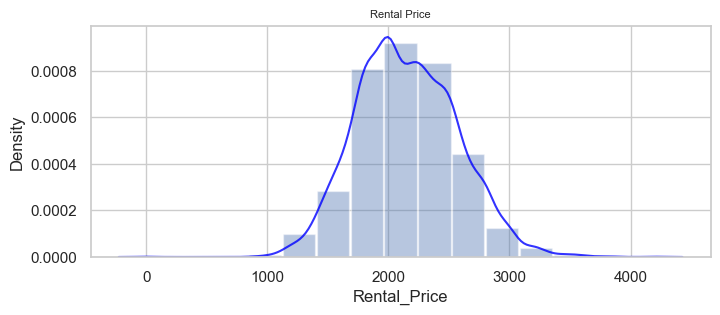

In [14]:
Y["Rental_Price"].hist(bins=15, density=True, color='b', alpha=0.4, rwidth=0.95, figsize=(8,3))
sns.kdeplot(Y["Rental_Price"], fill = False, color="blue", alpha=.8)
plt.title("Rental Price", fontsize=8)
plt.show()

X can be divided into two parts: Quantitative Macro Economic Features, and Quanlitative Position Features

In [15]:
X_quanlitative = X.drop(["GDP In Chained (2015) Dollars", "Total Unemployment Rate", "Resident Unemployment Rate", "Total Demand", "CPI/Inflation"
                         , "Total Domestic Demand", "Government Securities - 5-Year Bond Yield", "Government Securities - 2-Year Bond Yield",
                         "Government Securities - 10-Year Bond Yield"], axis = 1)
X_quantitative = X[["GDP In Chained (2015) Dollars", "Total Unemployment Rate", "Resident Unemployment Rate", "Total Demand", "CPI/Inflation"
                         , "Total Domestic Demand", "Government Securities - 5-Year Bond Yield", "Government Securities - 2-Year Bond Yield",
                         "Government Securities - 10-Year Bond Yield"]]

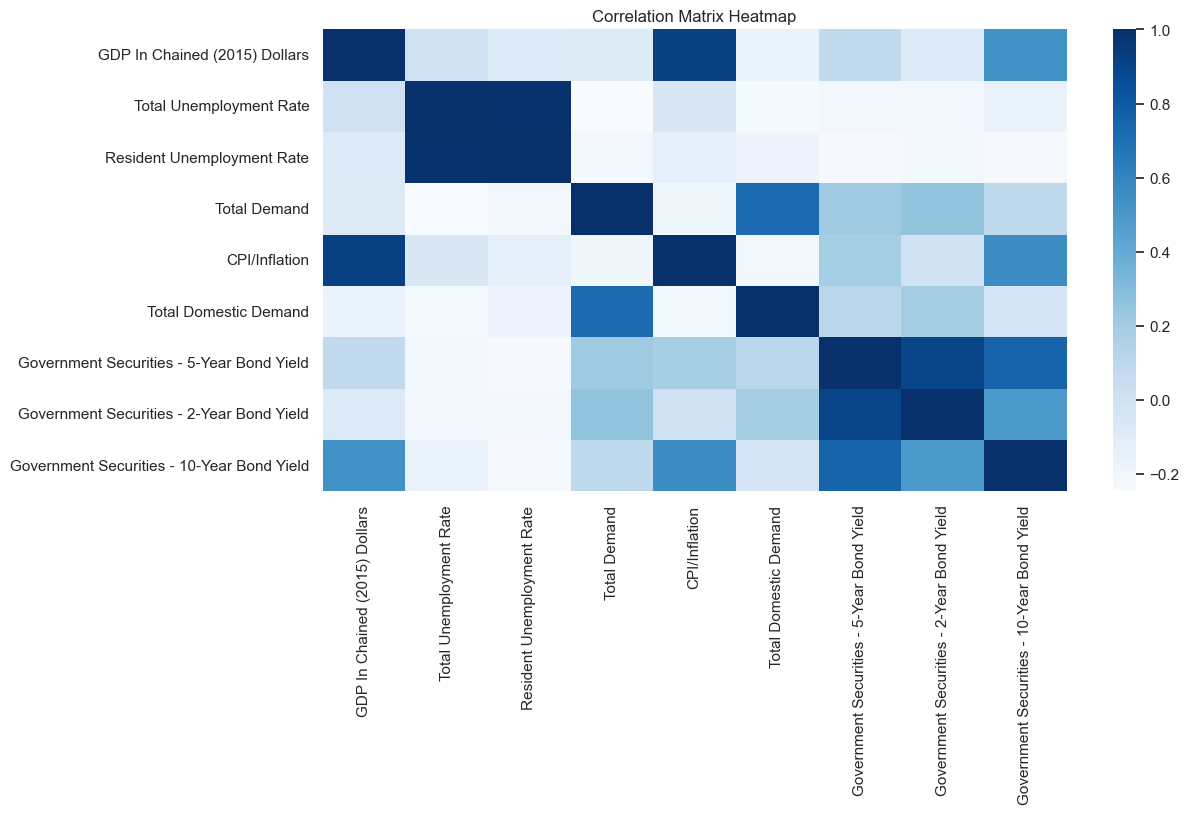

In [16]:
# create a correlation matrix
corr_matrix = X_quantitative.corr()

# plot the heat map
sns.heatmap(corr_matrix, cmap='Blues')
plt.title('Correlation Matrix Heatmap')
plt.show()

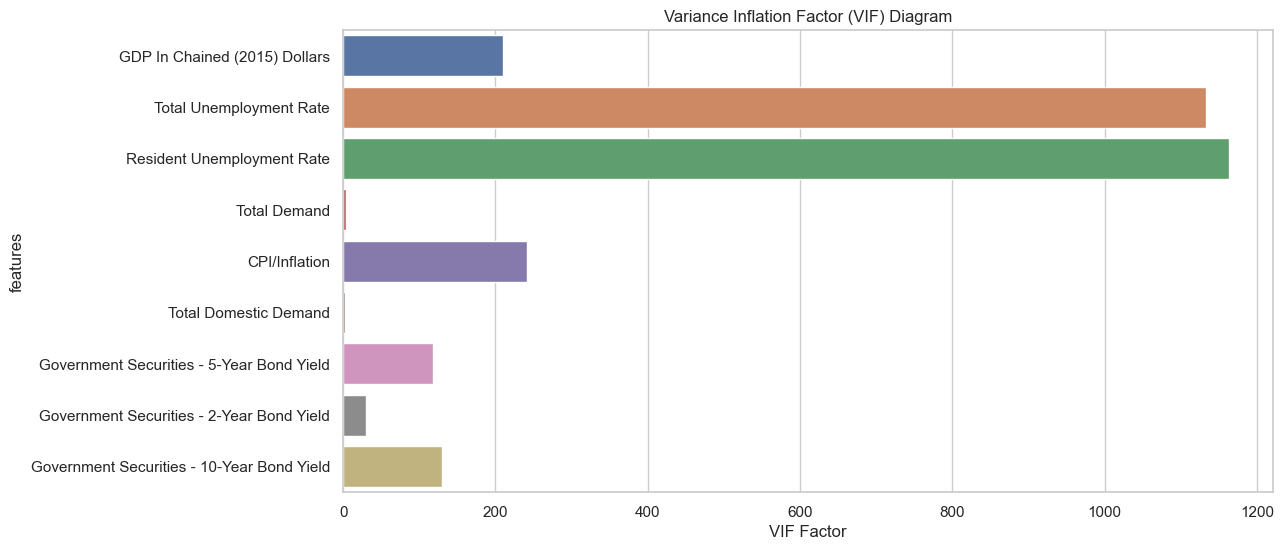

In [17]:
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

features = list(X_quantitative.columns)
vif = pd.DataFrame()
vif["features"] = features
vif["VIF Factor"] = [variance_inflation_factor(X_quantitative.values, i) for i in range(len(features))]
sns.barplot(x="VIF Factor", y="features", data=vif)
plt.title('Variance Inflation Factor (VIF) Diagram')
plt.show()

In [18]:
X_quantitative = X_quantitative.drop("Resident Unemployment Rate", axis = 1)

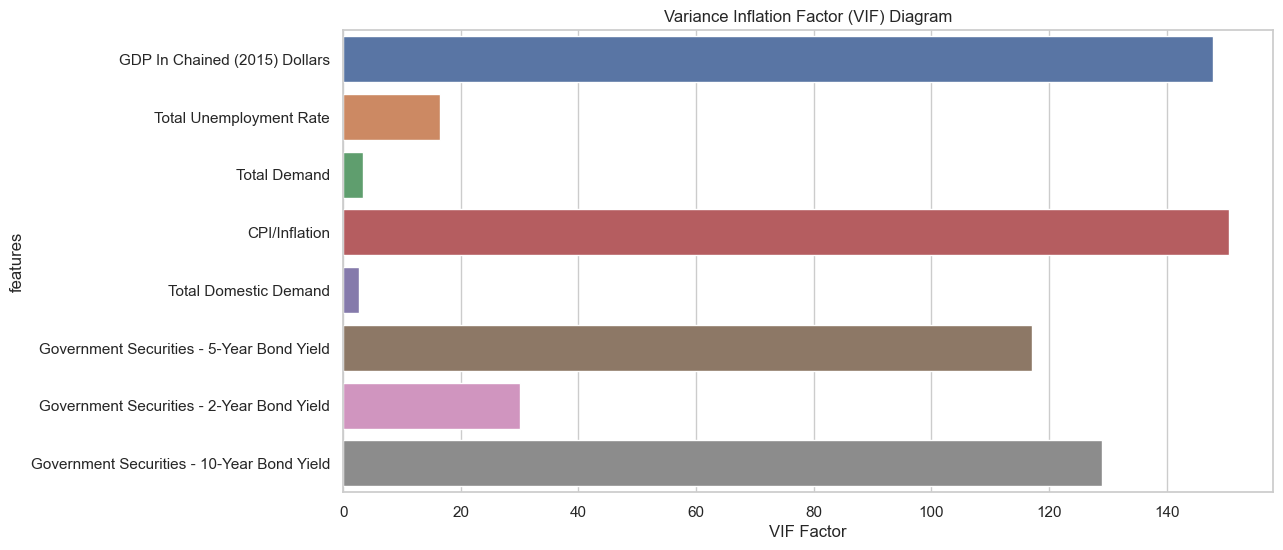

In [19]:
features = list(X_quantitative.columns)
vif = pd.DataFrame()
vif["features"] = features
vif["VIF Factor"] = [variance_inflation_factor(X_quantitative.values, i) for i in range(len(features))]
sns.barplot(x="VIF Factor", y="features", data=vif)
plt.title('Variance Inflation Factor (VIF) Diagram')
plt.show()

In [20]:
X_quantitative = X_quantitative.drop("Government Securities - 10-Year Bond Yield", axis = 1)

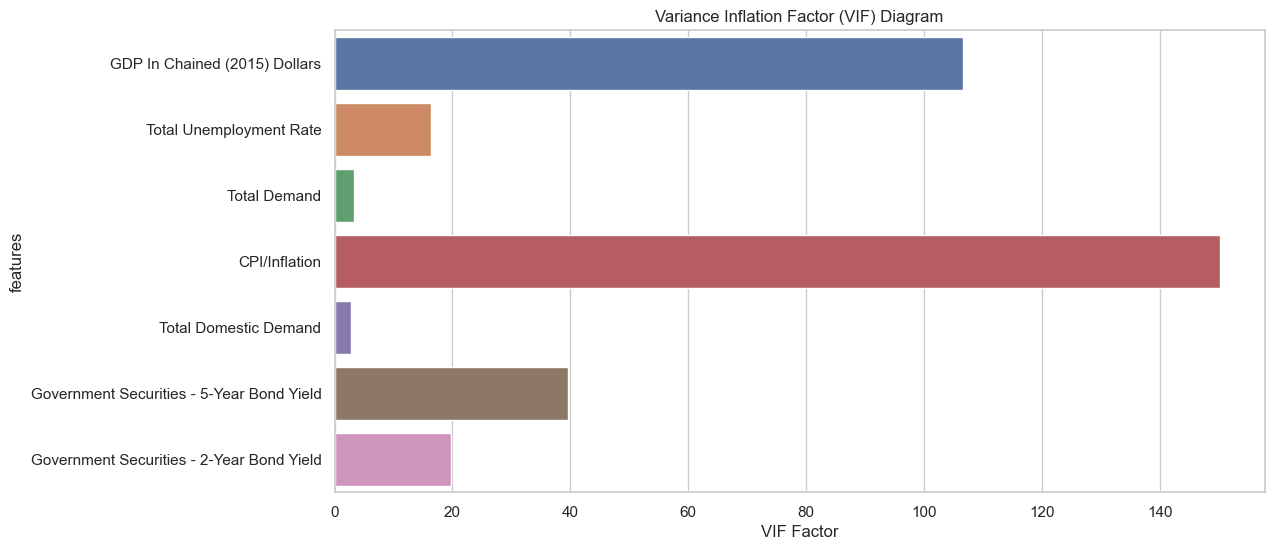

In [21]:
features = list(X_quantitative.columns)
vif = pd.DataFrame()
vif["features"] = features
vif["VIF Factor"] = [variance_inflation_factor(X_quantitative.values, i) for i in range(len(features))]
sns.barplot(x="VIF Factor", y="features", data=vif)
plt.title('Variance Inflation Factor (VIF) Diagram')
plt.show()

In [22]:
X_quantitative = X_quantitative.drop("CPI/Inflation", axis = 1)

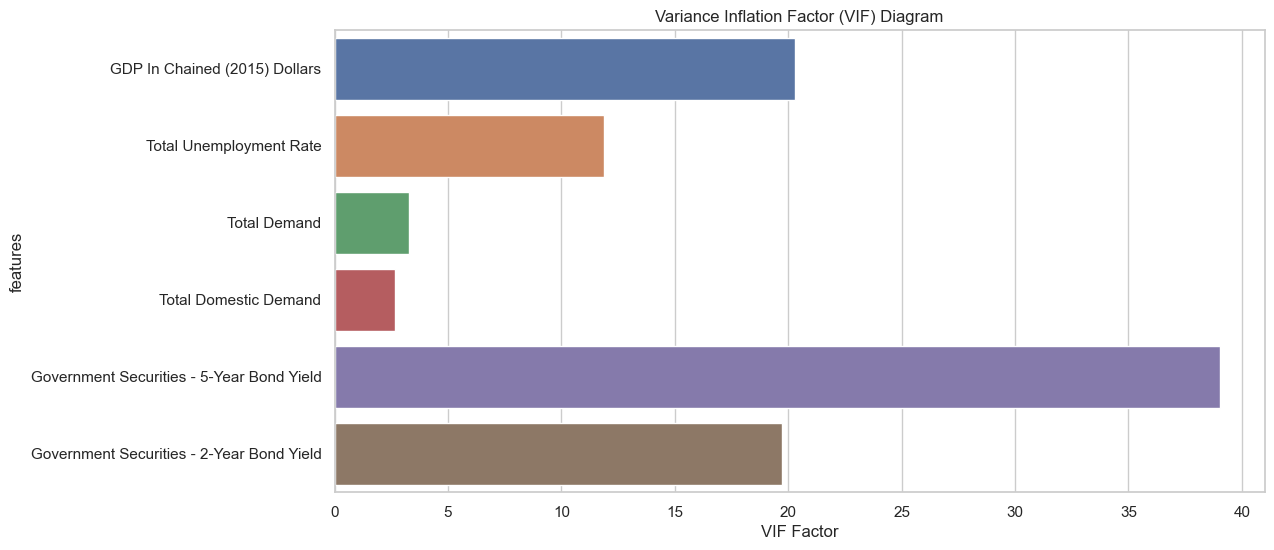

In [23]:
features = list(X_quantitative.columns)
vif = pd.DataFrame()
vif["features"] = features
vif["VIF Factor"] = [variance_inflation_factor(X_quantitative.values, i) for i in range(len(features))]
sns.barplot(x="VIF Factor", y="features", data=vif)
plt.title('Variance Inflation Factor (VIF) Diagram')
plt.show()

In [24]:
X_quantitative = X_quantitative.drop("Government Securities - 5-Year Bond Yield", axis = 1)

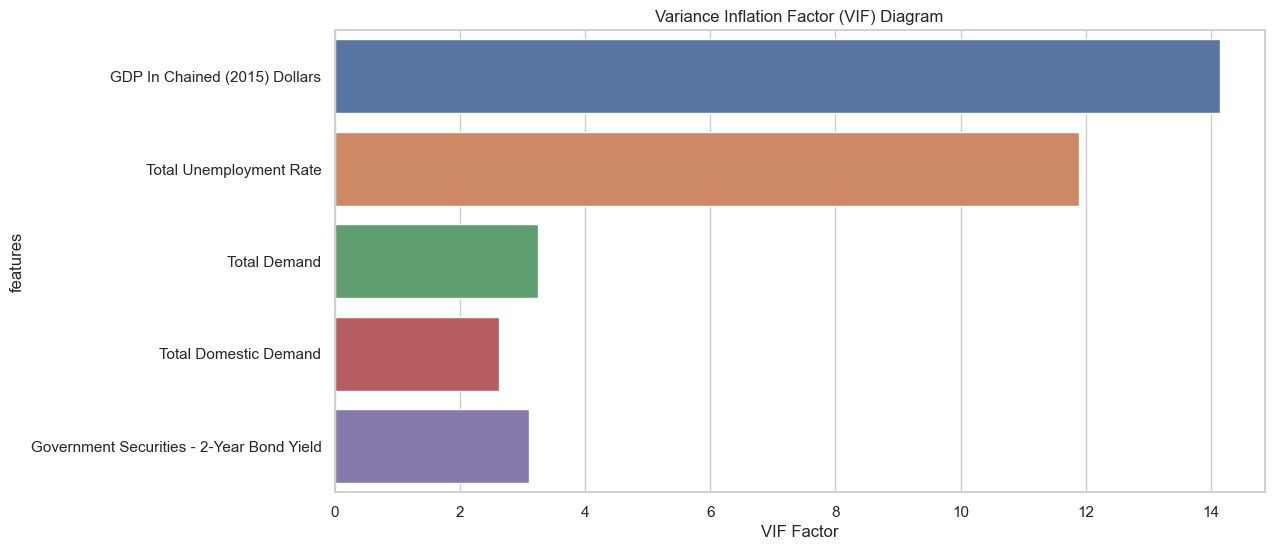

In [25]:
features = list(X_quantitative.columns)
vif = pd.DataFrame()
vif["features"] = features
vif["VIF Factor"] = [variance_inflation_factor(X_quantitative.values, i) for i in range(len(features))]
sns.barplot(x="VIF Factor", y="features", data=vif)
plt.title('Variance Inflation Factor (VIF) Diagram')
plt.show()

In [26]:
from sklearn.decomposition import PCA

In [27]:
n_components = 5
pca = PCA(n_components=n_components)

pca.fit(X_quanlitative)

pca_df = pca.transform(X_quanlitative)

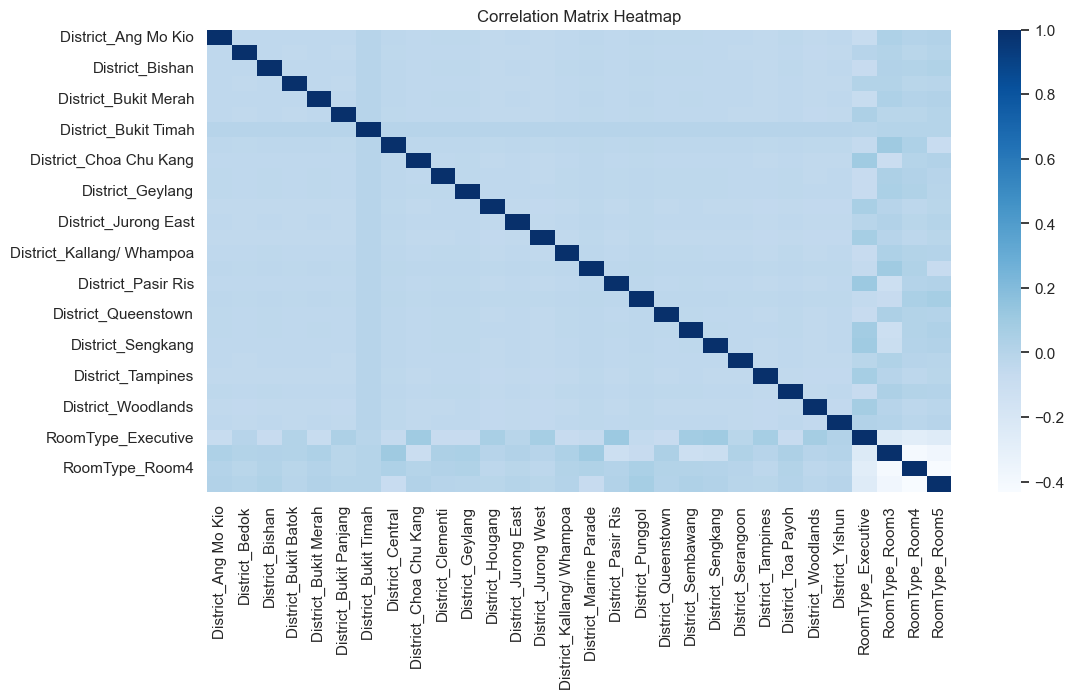

In [28]:
# create a correlation matrix
corr_matrix = X_quanlitative.corr()

# plot the heat map
sns.heatmap(corr_matrix, cmap='Blues')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [29]:
Total_afterEDA = pd.merge(X_quanlitative, X_quantitative, on=X_quanlitative.index, how='left')
Total_afterEDA = Total_afterEDA.drop("key_0", axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(Total_afterEDA, Y, test_size=0.2, random_state=101)

In [30]:
def scaling(TrainData, TestData, scaler):
    TrainToBeScaled = TrainData.copy()
    TestToBeScaled = TestData.copy()
    cols_to_scale = ["GDP In Chained (2015) Dollars", 'Total Unemployment Rate', 
                     'Total Demand', 'Total Domestic Demand', "Government Securities - 2-Year Bond Yield"]

    TrainToBeScaled = scaler.fit_transform(TrainToBeScaled[cols_to_scale])
    TestToBeScaled = scaler.transform(TestToBeScaled[cols_to_scale])
    TrainIndex = TrainData.index
    TestIndex = TestData.index

    TrainToBeScaled = pd.DataFrame(TrainToBeScaled, columns = cols_to_scale,index = TrainIndex)
    TestToBeScaled = pd.DataFrame(TestToBeScaled, columns = cols_to_scale, index = TestIndex)  

    TrainData_Scaled = TrainData.drop(cols_to_scale, axis = 1)
    TrainData_Scaled = pd.concat([TrainData_Scaled, TrainToBeScaled], axis = 1)
    TestData_Scaled = TestData.drop(cols_to_scale, axis = 1)
    TestData_Scaled = pd.concat([TestData_Scaled, TestToBeScaled], axis = 1)

    return TrainData_Scaled, TestData_Scaled

In [31]:
X_train_sc_df, X_test_sc_df = scaling(X_train, X_test, StandardScaler())
X_train_sc_df.to_csv(path + "Processed/X_train_sc.csv")
X_test_sc_df.to_csv(path+"Processed/X_test_sc.csv")

In [32]:
X_train_mmx_df, X_test_mmx_df = scaling(X_train, X_test, MinMaxScaler())
X_train_mmx_df.to_csv(path + "Processed/X_train_mmx.csv")
X_test_mmx_df.to_csv(path+"Processed/X_test_mmx.csv")

In [33]:
Y_train.to_csv(path + "Processed/Y_train.csv")
Y_test.to_csv(path + "Processed/Y_test.csv")
